# Ergodicity. Anton Ryabtsev. DCAM MIPT.

Процесс $X(t) = K(t+1)-K(t)$, где $K(t)$ — пуассоновский процесс, эргодичен по дисперсии. Это значит, что квадрат центрированного процесса является эргодическим по математическому ожиданию.

**Задача:** смоделировать этот квадрат центрированного процесса, взять от него на интервале $[0,T]$ интеграл, поделить на $T$, и показать что любая реализация устаканивается около дисперсии $X(t)$. Это и есть явление эргодичности по дисперсии.

### Решение:

**Дисперсия.**

Дисперсия процесса $Y(t) = K(t) - K(s)$ известна:

$$
\mathbb{D} Y(t) = \mathbb{D} \bigl(K(t) - K(s)\bigr) = \lambda(t - s)\;\; \text{ для любых } t > s \ge 0
$$

Значит

$$
\fbox{$\mathbb{D} X(t) = \lambda$}
$$

**Центрированный процесс.**

$$
\fbox{$\overset{о}X(t) = X(t) - \mathbb{E}X(t)$}
$$


**Интеграл.**
Вычислять интеграл функции будем методом прямоугольников:
$$
\int\limits_{a}^{b} f(x)dx = \dfrac{\sum\limits_{i=1}^N f(x_i) \cdot (b - a)}{N} 
$$

В нашей задаче $a = 0$, $b = T[-1]$ — момент, когда произошёл последнйи скачок. Последовательность значений функции в точках $\left\{f(x_i)\right\}_{i=1}^N$ задаётся списком X_T, а количество точек $N$ в сетке $t$ равно $len(t)$.

Таким образом:

$$
\dfrac{1}{T} \int\limits_{0}^{T} f(x)dx = \dfrac{1}{T[-1]}\dfrac{np.sum(X_T)\cdot T[-1]}{len(t)} = 
\dfrac{np.sum(X_T)}{len(t)} = np.mean(X_T)
$$

$$
\fbox{$\dfrac{1}{T} \int\limits_{0}^{T} f(x)dx = np.mean(X_T)$}
$$

**Outcomes.**

Мы хотим убедиться, что

$$
np.mean(X_T) \approx \lambda
$$

**Метрика качества.** 

Относительная ошибка:

$$
error = \dfrac{\bigl|\lambda_{true}-\lambda_{calc}\bigr|}{\lambda_{true}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Ergodicity_evidence():    
    def __init__(self, lamb, N):
        self.lamb = lamb
        self.N = N        
        # Генерируем случайный вектор из Exp(lamb) - это интервалы времени между соседними скачками
        time_intervals = np.random.exponential(1/self.lamb, self.N)
        # Каждый i-ый элемент списка T (нумерация с 1) есть время, 
        # прошедшее от начала процесса до i-ого скачка       
        self.T = [np.sum(time_intervals[0:i]) for i in range(len(time_intervals))][1:]
        # Сетка времени t от 0 до момента последнего скачка. Количество точек num = 20 * N,
        # где N - количество скачков.
        self.t = np.linspace(0, self.T[-1], 20 * len(self.T))        
    
    """Находит количество скачков, произошедших до момента времени t"""
    def K_t(self, time):        
        temp_T = self.T[:]
        temp_T.append(time)
        temp_T = list(np.sort(temp_T))
        return temp_T.index(time)
    
    """Находит количество скачков, произошедших между моментами времени t и t+1"""
    def X_t(self, time):
        return self.K_t(time + 1) - self.K_t(time)
    
    """Смещение на матожидание и возведение в квадрат"""
    def X_t_centered(self, time):
        return (self.X_t(time) - self.lamb)**2
    
    """Отрисовка графиков"""
    def plot(self, realization, process_name, hatch=False):
        plt.figure(figsize=(15,10))
        plt.plot(self.t, realization, label=f'Lambda = {self.lamb}')
        if (hatch): 
            plt.fill_between(self.t, realization, facecolor="none", hatch='/', edgecolor='b', step="pre", alpha=0.4)
        plt.legend(loc=2)
        plt.title(f"{process_name} process for T = {round(self.T[-1], 2)}",\
                  fontdict={'fontname': 'Times New Roman', 'fontsize': 21}, y=1.03)
        plt.grid()
        plt.ylim(0)
        plt.xlim(0);
    
    def evidence(self):
        T = self.T
        t = self.t
        
        # Реализация процесса K(t)
        K_T = [self.K_t(time) for time in t]
        self.plot(K_T, 'Poisson')
        
        # Реализация процесса X(t) центрированного
        X_T_centered = [self.X_t_centered(time) for time in t]
        self.plot(X_T_centered, '$(X(t) - m_K(t))^2$', hatch=True)
        
        print(f'Real lambda: {self.lamb}\nCalculated: {round(np.mean(X_T_centered), 3)}\
        \nError: {round(np.abs(self.lamb - np.mean(X_T_centered)) * 100 / self.lamb, 1)}%')
        
        
    def integral(self, T_param, time_intervals):
        lamb = self.lamb
        # Генерируем случайный вектор из Exp(lamb) - это интервалы времени между соседними скачками
        
        
        
        # Каждый i-ый элемент списка T (нумерация с 1) есть время, 
        # прошедшее от начала процесса до i-ого скачка
        self.T = [np.sum(time_intervals[0:i]) for i in range(len(time_intervals))][1:]
        print('OK')
        temp_T = self.T[:]
        temp_T.append(T_param)
        temp_T = list(np.sort(temp_T))
        self.T = self.T[0:temp_T.index(T_param)]
#         print(self.T)
        # Сетка времени t от 0 до момента последнего скачка. Количество точек num = 20 * N,
        # где N - количество скачков.
        t = np.linspace(0, self.T[-1], 5 * len(self.T))    
#         self.K_T = [self.K_t(time) for time in t]

        # Реализация процесса X(t) центрированного
        X_T_centered = [self.X_t_centered(time) for time in t]
        return round(np.mean(X_T_centered), 3)

In [173]:
time = np.linspace(10, 400, 16)
# time_intervals = np.random.exponential(1/1, 10**4)

In [3]:
time_intervals = np.random.exponential(1/1, 10**4)
evidencer1 = Ergodicity_evidence(lamb=1, N=10000)
integral2 = [evidencer1.integral(time_i, time_intervals) for time_i in time]
time_intervals = np.random.exponential(1/1, 10**4)
evidencer1 = Ergodicity_evidence(lamb=1, N=10000)
integral3 = [evidencer1.integral(time_i, time_intervals) for time_i in time]
time_intervals = np.random.exponential(1/1, 10**4)
evidencer1 = Ergodicity_evidence(lamb=1, N=10000)
integral4 = [evidencer1.integral(time_i, time_intervals) for time_i in time]

time_intervals = np.random.exponential(1/1, 10**4)
evidencer1 = Ergodicity_evidence(lamb=1, N=10000)
integral5 = [evidencer1.integral(time_i, time_intervals) for time_i in time]
time_intervals = np.random.exponential(1/1, 10**4)
evidencer1 = Ergodicity_evidence(lamb=1, N=10000)
integral6 = [evidencer1.integral(time_i, time_intervals) for time_i in time]
time_intervals = np.random.exponential(1/1, 10**4)
evidencer1 = Ergodicity_evidence(lamb=1, N=10000)
integral7 = [evidencer1.integral(time_i, time_intervals) for time_i in time]

time_intervals = np.random.exponential(1/1, 10**4)
evidencer1 = Ergodicity_evidence(lamb=1, N=10000)
integral8 = [evidencer1.integral(time_i, time_intervals) for time_i in time]
time_intervals = np.random.exponential(1/1, 10**4)
evidencer1 = Ergodicity_evidence(lamb=1, N=10000)
integral9 = [evidencer1.integral(time_i, time_intervals) for time_i in time]
time_intervals = np.random.exponential(1/1, 10**4)
evidencer1 = Ergodicity_evidence(lamb=1, N=10000)
integral10 = [evidencer1.integral(time_i, time_intervals) for time_i in time]

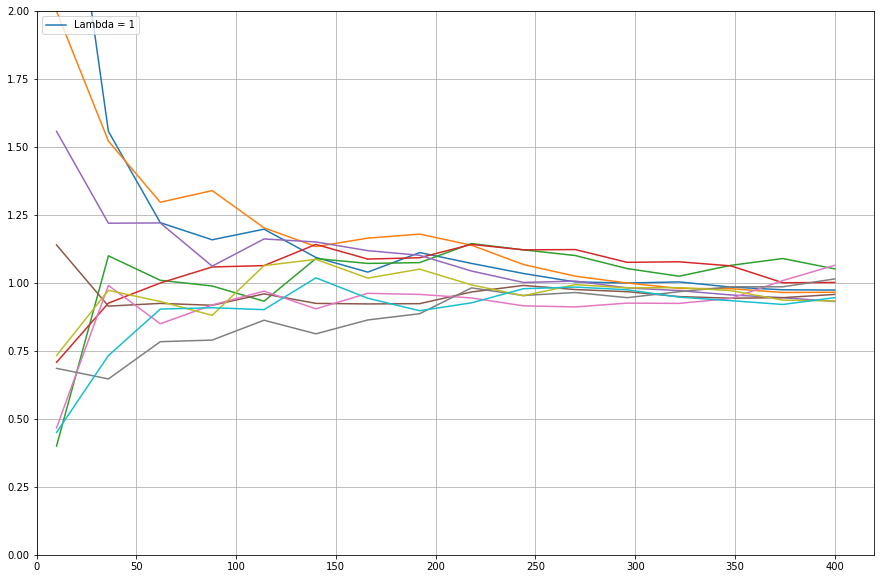

In [177]:
plt.figure(figsize=(15,10))
plt.plot(time, integral, label=f'Lambda = 1')
plt.plot(time, integral2)
plt.plot(time, integral3)
plt.plot(time, integral4)

plt.plot(time, integral5)
plt.plot(time, integral6)
plt.plot(time, integral7)

plt.plot(time, integral8)
plt.plot(time, integral9)
plt.plot(time, integral10)

plt.legend(loc=2)
plt.grid()
plt.ylim(0, 2)
plt.xlim(0);

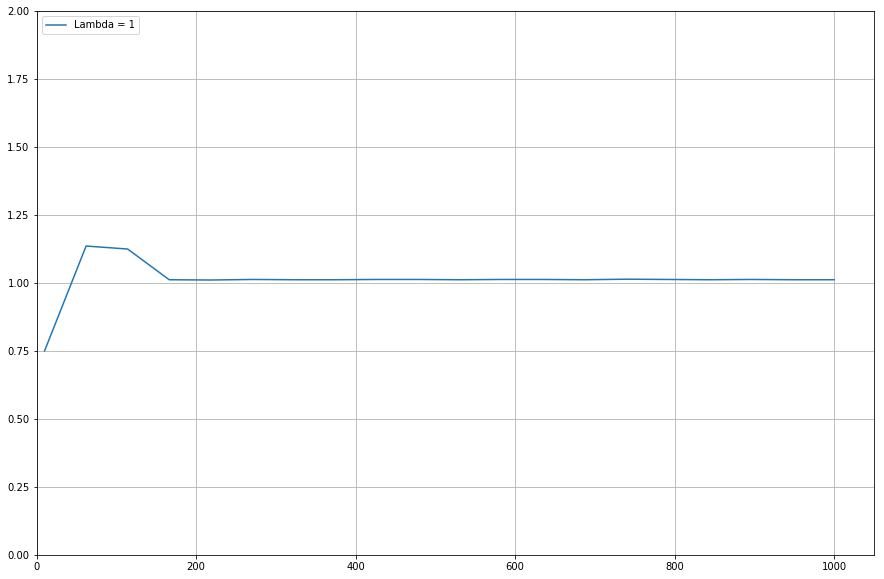

In [48]:
plt.figure(figsize=(15,10))
plt.plot(time, integral, label=f'Lambda = 1')
plt.legend(loc=2)
plt.grid()
plt.ylim(0, 2)
plt.xlim(0);

# Lambda = 1

Рассмотрим три набора промежутков времени между скачками, отличающихся количеством скачков: $N = \{100, 1000, 2000\}$

## N = 100

Real lambda: 1
Calculated: 0.859        
Error: 14.1%


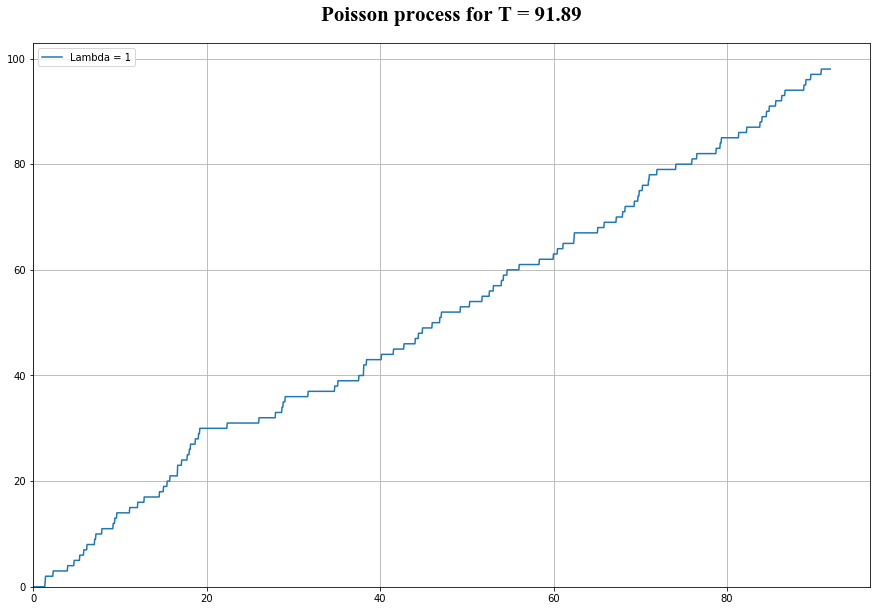

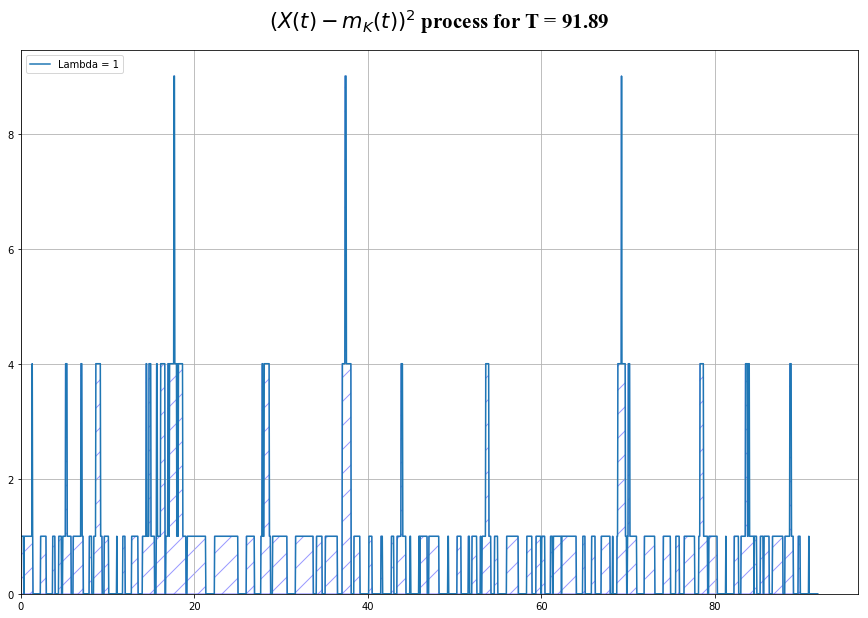

In [41]:
evidencer1 = Ergodicity_evidence(lamb=1, N=100)
evidencer1.evidence()

## N = 1000 (может выполняться долго)

Real lambda: 1
Calculated: 1.001        
Error: 0.1%


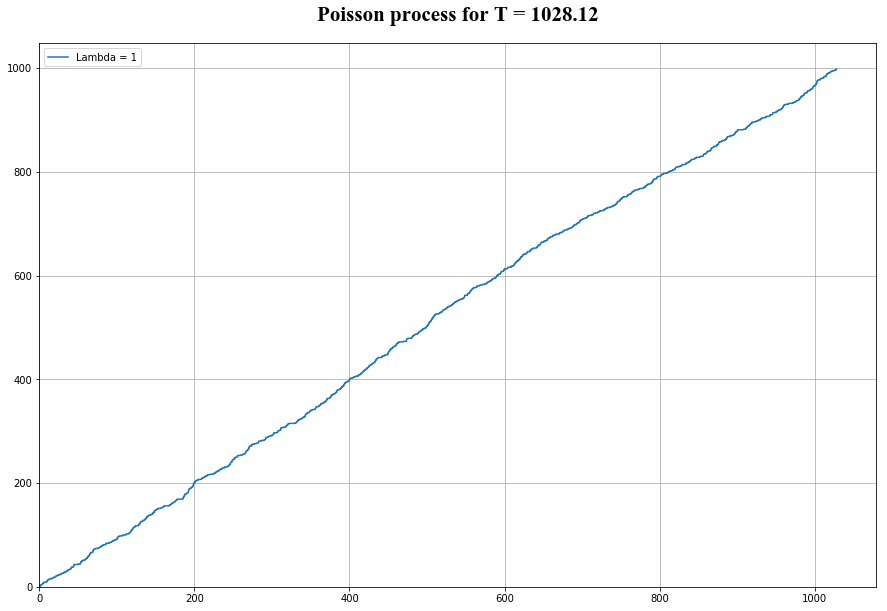

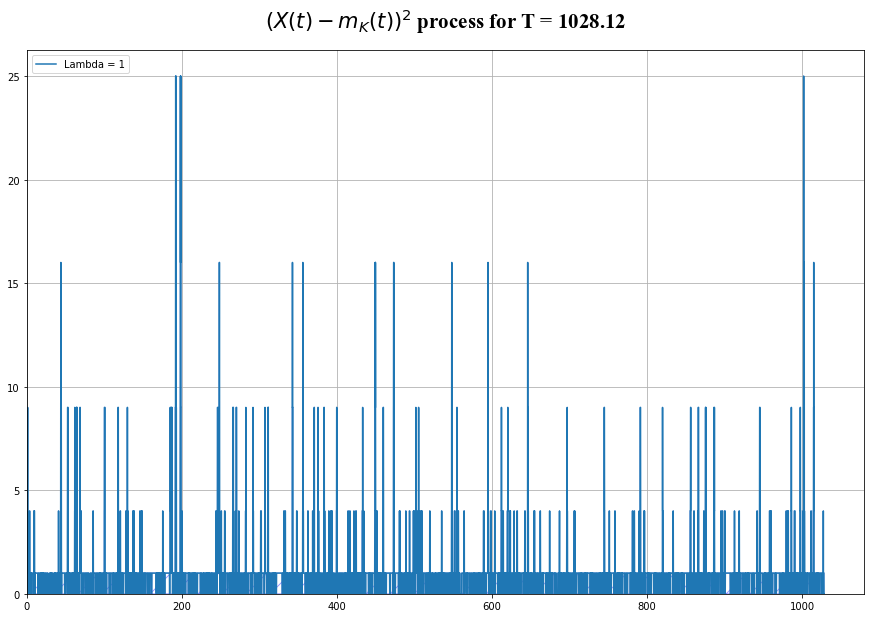

In [42]:
evidencer2 = Ergodicity_evidence(lamb=1, N=1000)
evidencer2.evidence()

## N = 2000

Real lambda: 1
Calculated: 0.922        
Error: 7.8%


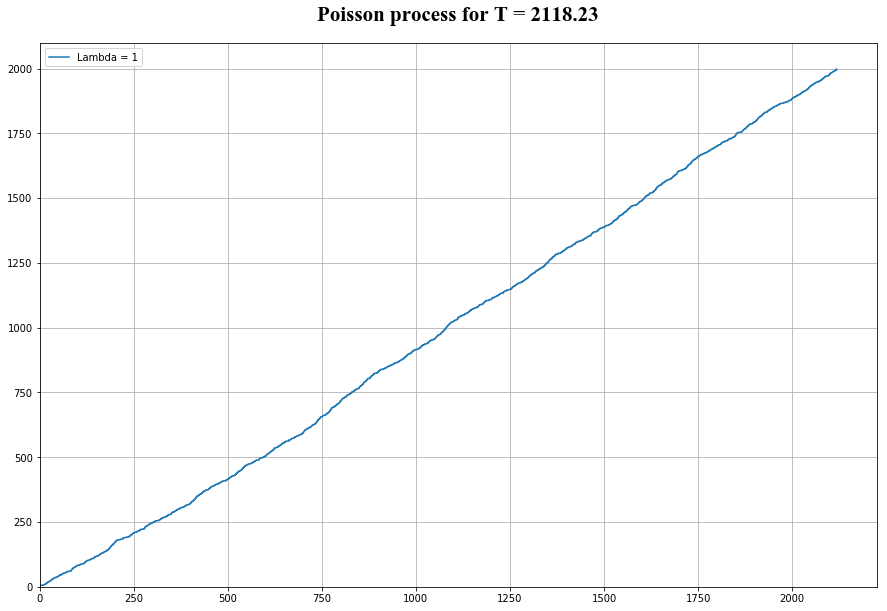

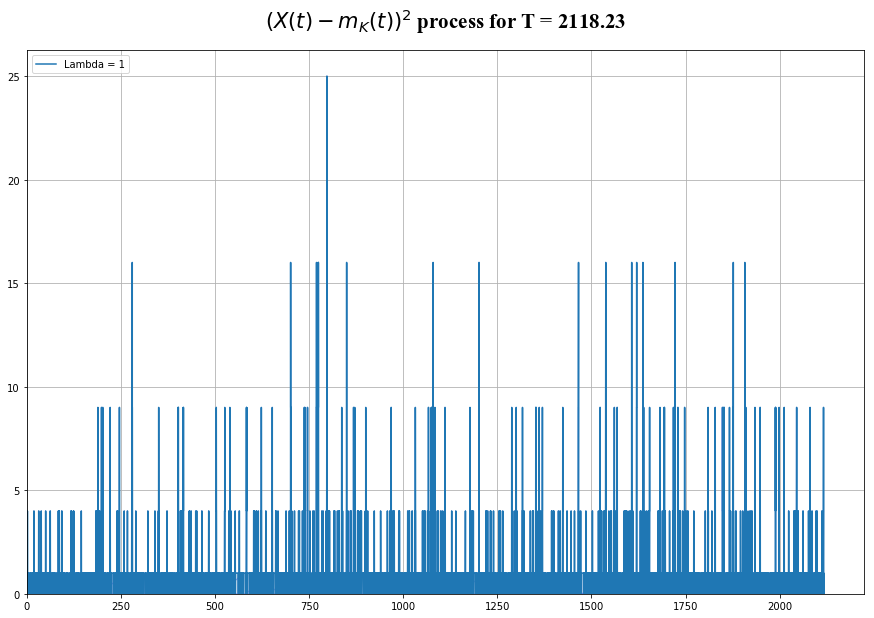

In [43]:
evidencer3 = Ergodicity_evidence(lamb=1, N=2000)
evidencer3.evidence()

# Lambda = 3

Рассмотрим три набора промежутков времени между скачками, отличающихся количеством скачков: $N = \{100, 1000, 2000\}$

## N = 100

Real lambda: 3
Calculated: 2.453        
Error: 18.2%


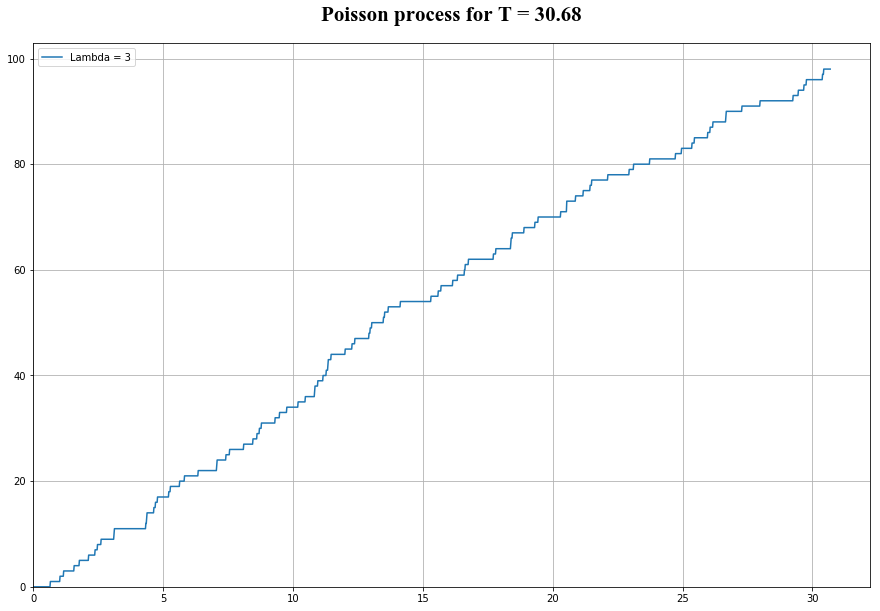

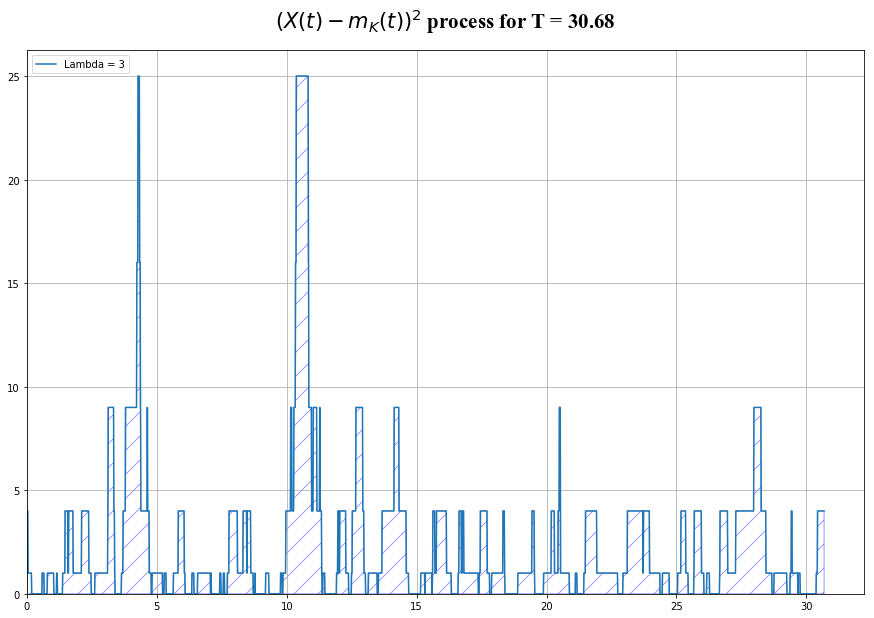

In [44]:
evidencer4 = Ergodicity_evidence(lamb=3, N=100)
evidencer4.evidence()

## N = 1000

Real lambda: 3
Calculated: 3.127        
Error: 4.2%


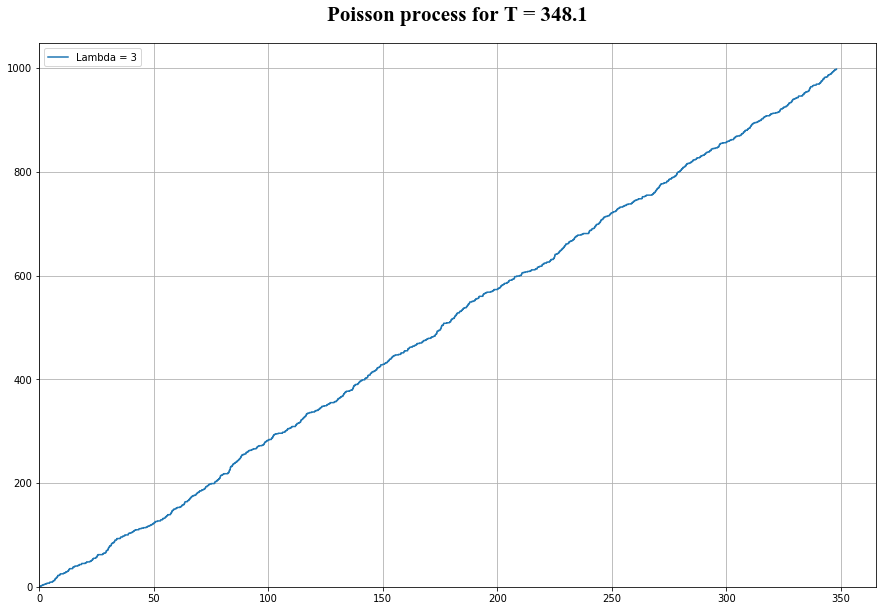

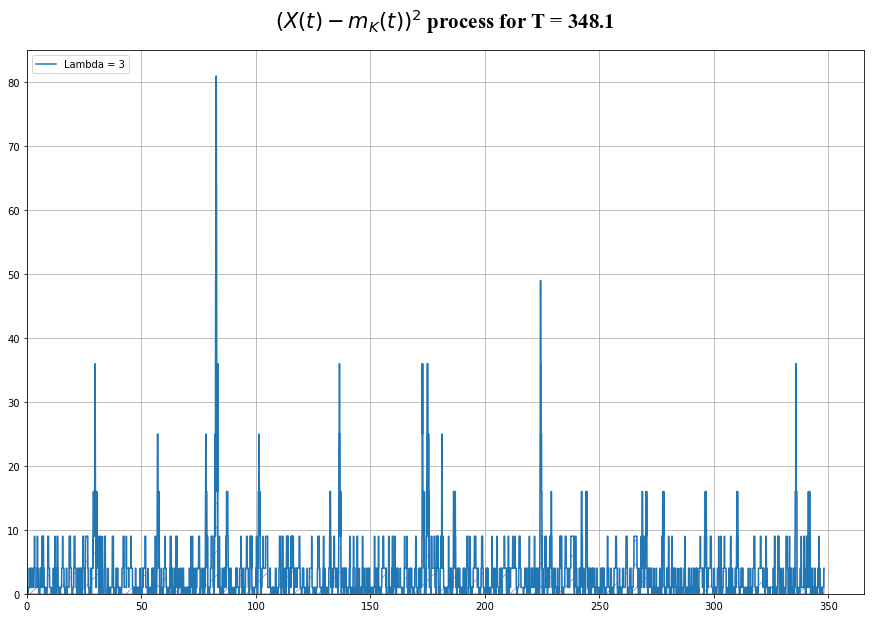

In [45]:
evidencer5 = Ergodicity_evidence(lamb=3, N=1000)
evidencer5.evidence()

## N = 2000

Real lambda: 3
Calculated: 2.886        
Error: 3.8%


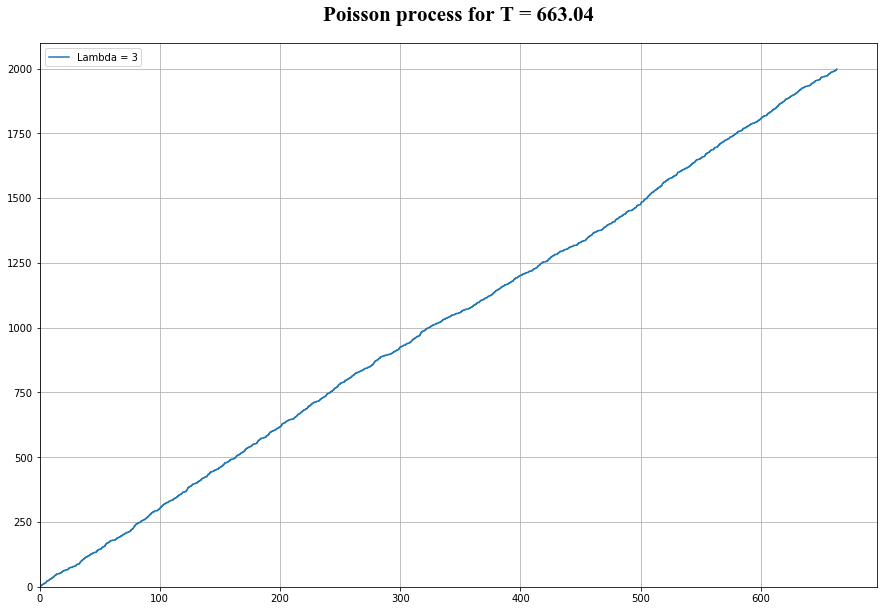

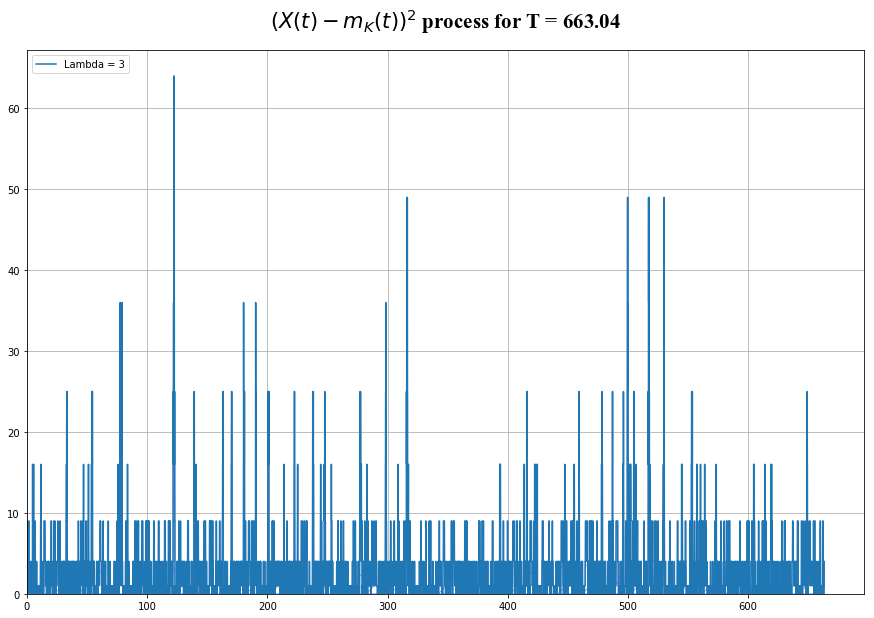

In [46]:
evidencer6 = Ergodicity_evidence(lamb=3, N=2000)
evidencer6.evidence()

# Lambda = 5

Рассмотрим три набора промежутков времени между скачками, отличающихся количеством скачков: $N = \{100, 1000, 2000\}$

## N = 100

Real lambda: 5
Calculated: 4.043        
Error: 19.1%


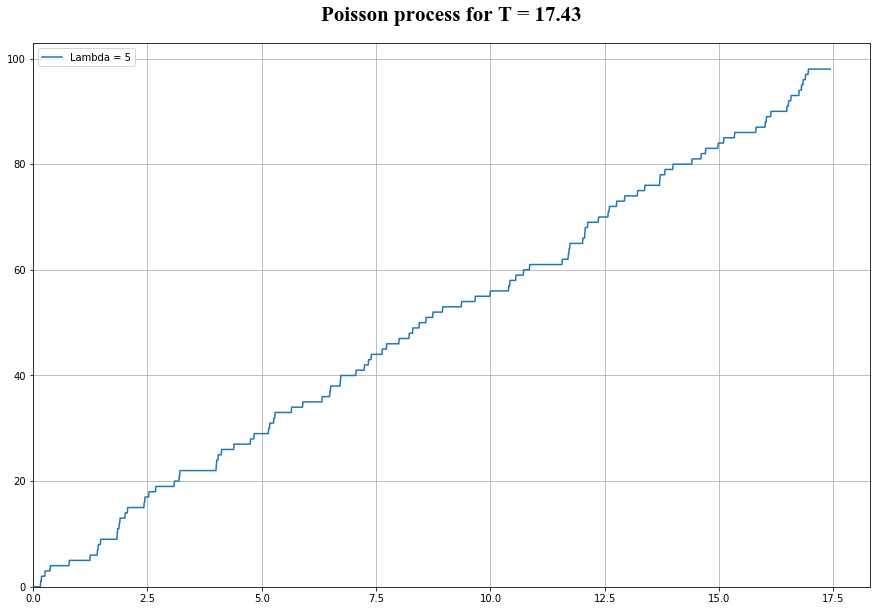

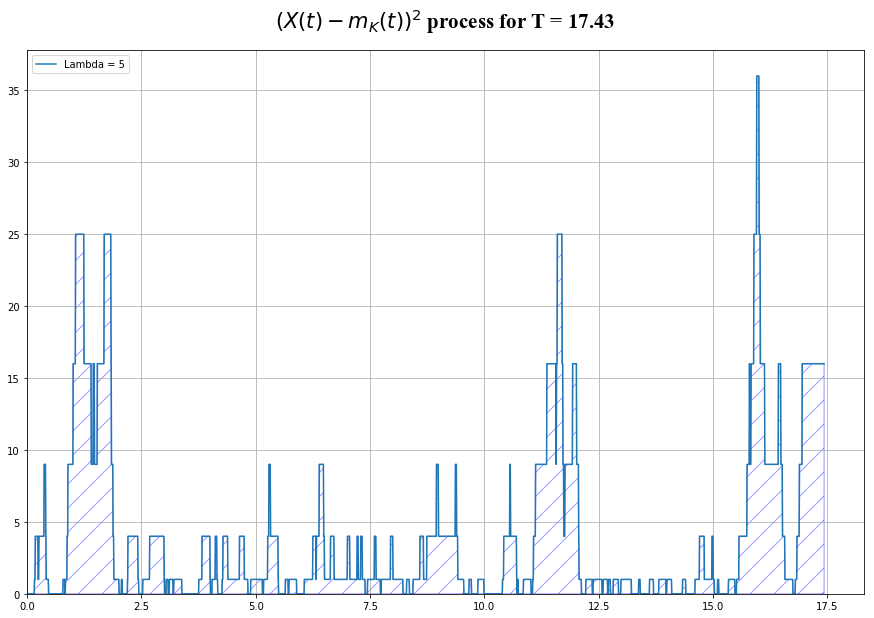

In [47]:
evidencer7 = Ergodicity_evidence(lamb=5, N=100)
evidencer7.evidence()

## N = 1000

Real lambda: 5
Calculated: 5.361        
Error: 7.2%


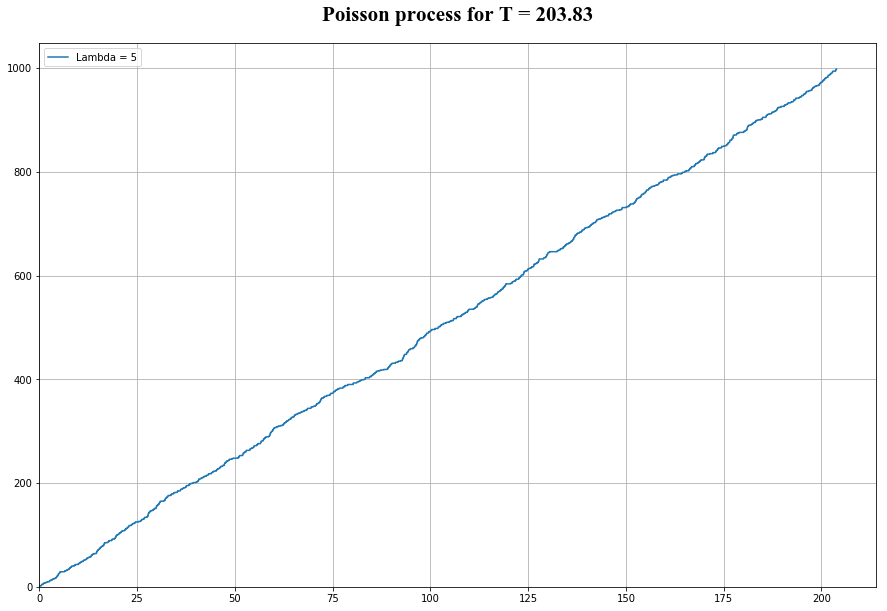

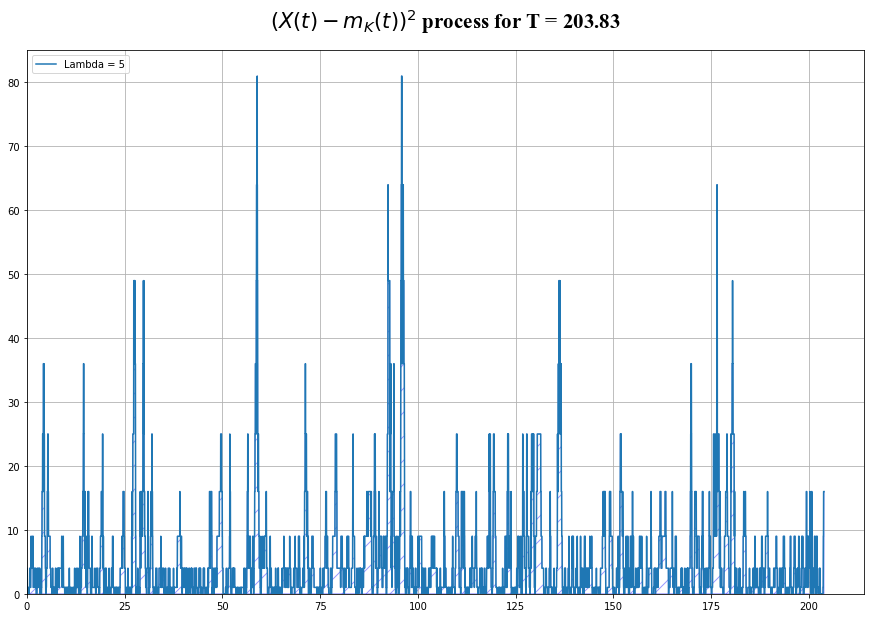

In [48]:
evidencer7 = Ergodicity_evidence(lamb=5, N=1000)
evidencer7.evidence()

## N = 2000

Real lambda: 5
Calculated: 4.889        
Error: 2.2%


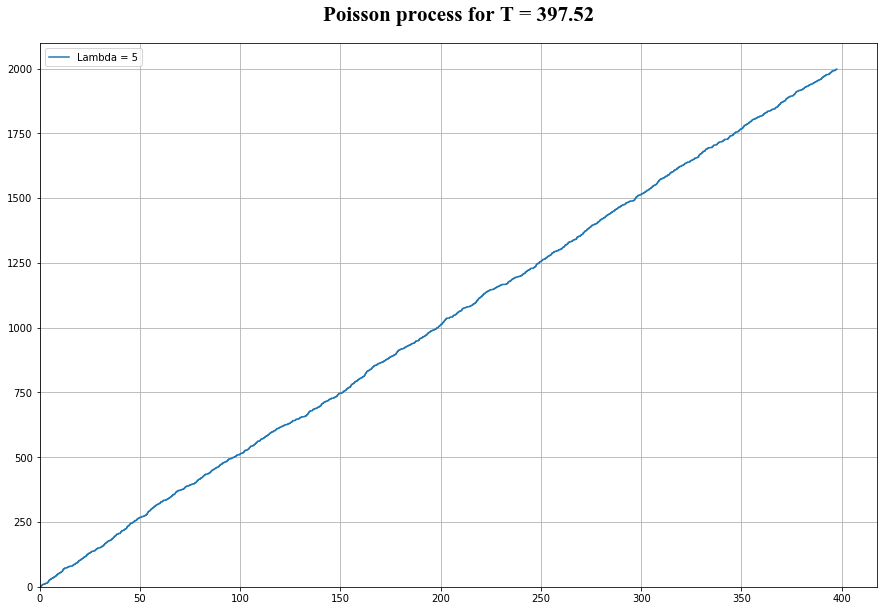

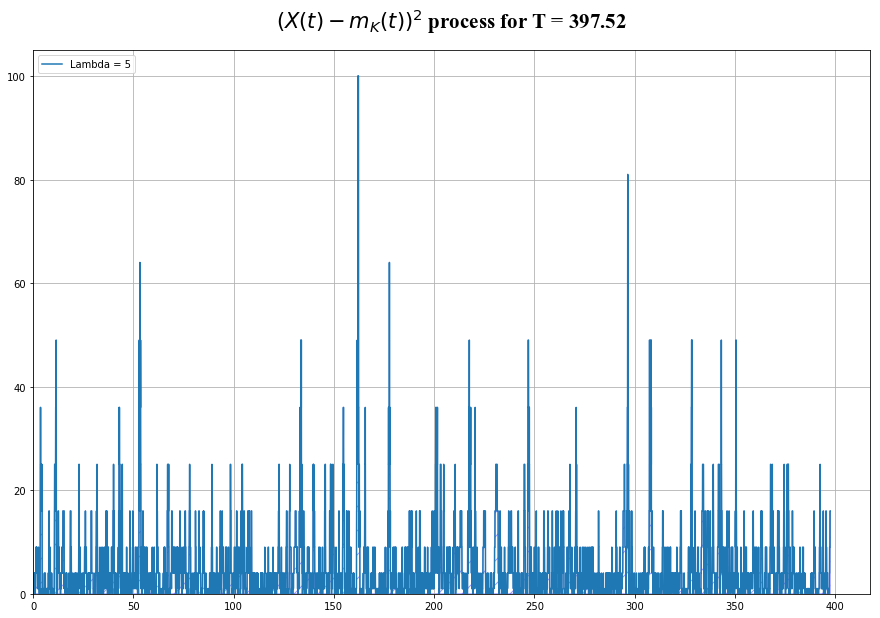

In [49]:
evidencer8 = Ergodicity_evidence(lamb=5, N=2000)
evidencer8.evidence()